In [1]:
#from dotenv import load_dotenv, find_dotenv
import os 
import psycopg2
import requests
from sqlalchemy import create_engine
import pandas as pd
#dotenv_path = "/home/usrnoc/notebooks/.env"
#load_dotenv(dotenv_path)
# Acceder a las variables
#DB_NAME = os.getenv("DB_NAME")
#DB_NAME ='zabbix'
#DB_USER = os.getenv("DB_USER")
#DB_PASSWORD = os.getenv("DB_PASSWORD")
#DB_HOST = os.getenv("DB_HOST")
#DB_PORT = os.getenv("DB_PORT")
#engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}")
#conn = psycopg2.connect(database=DB_NAME,user=DB_USER,host=DB_HOST,password=DB_PASSWORD,port=DB_PORT)
#cur = conn.cursor()

In [2]:
DB_NAME = "iot_course"
DB_USER = "iot_usr" 
DB_PASSWORD = "upy_student_Admin1"
DB_HOST = "localhost"
DB_PORT = "5432"  #172.16.15.192

In [3]:
engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}")
conn = psycopg2.connect(database=DB_NAME,user=DB_USER,host=DB_HOST,password=DB_PASSWORD,port=DB_PORT)
cur = conn.cursor()

In [6]:
df = pd.DataFrame(
    [
        {'dia':'lunes','conteo':5},
        {'dia':'martes','conteo':10},
        {'dia':'miercoles','conteo':20},
        {'dia':'jueves','conteo':30},
        {'dia':'viernes','conteo':40},
        {'dia':'sabado','conteo':50},
        {'dia':'domingo','conteo':60},
        
    ]
)
df

,dia,conteo
0,lunes,5
1,martes,10
2,miercoles,20
3,jueves,30
4,viernes,40
5,sabado,50
6,domingo,60


In [8]:
df.to_sql(name='table_jose_augusto',con=engine,if_exists='replace',index=False)

7

In [ ]:
psql -U iot_usr -d iot_course -h localhost

In [ ]:
CREATE TABLE lake_raw_data_int (
    id BIGSERIAL PRIMARY KEY,
    topic TEXT NOT NULL,
    payload TEXT NOT NULL,
    value BIGINT NOT NULL,
    ts TIMESTAMPTZ NOT NULL DEFAULT now()    
);

In [ ]:
CREATE TABLE lake_raw_data_float (
    id BIGSERIAL PRIMARY KEY,
    topic TEXT NOT NULL,
    payload TEXT NOT NULL,
    value DOUBLE PRECISION NOT NULL,
    ts TIMESTAMPTZ NOT NULL DEFAULT now()    
);

In [ ]:
DB_NAME = "iot_course"
DB_USER = "iot_usr" 
DB_PASSWORD = "upy_student_Admin1"
DB_HOST = "localhost"
DB_PORT = "5432"

In [ ]:
#import psycopg2
import json

DB_CONFIG = {"host": "localhost","port": 5432,"dbname": "iot_course","user": "iot_usr","password": "upy_student_Admin1"}

def insert_int(topic: str, payload: dict, value: int):
    conn = psycopg2.connect(**DB_CONFIG)
    cur = conn.cursor()

    cur.execute(
        """
        INSERT INTO lake_raw_data_int (topic, payload, value)
        VALUES (%s, %s, %s)
        """,
        (topic, json.dumps(payload), value)
    )

    conn.commit()
    cur.close()
    conn.close()

def insert_float(topic: str, payload: dict, value: float):
    conn = psycopg2.connect(**DB_CONFIG)
    cur = conn.cursor()

    cur.execute(
        """
        INSERT INTO lake_raw_data_float (topic, payload, value)
        VALUES (%s, %s, %s)
        """,
        (topic, json.dumps(payload), value)
    )

    conn.commit()
    cur.close()
    conn.close()


# Example usage
#if __name__ == "__main__":
#    insert_int("lake/raw/int", {"value": 42}, 42)
#    insert_float("lake/raw/float", {"value": 13.37}, 13.37)

In [18]:
ata_float (topic, payload, value)
        VALUES (%s, %s, %s… Leer más
2:57 p.m.
import json

def on_message(client, userdata, msg):
    print(f"Topic: {msg.topic}")

    try:

In [19]:
payload = '{"value": 42}'

In [20]:
json.dumps(payload)

'"{\\"value\\": 42}"'

In [22]:
df2 = pd.read_sql("SELECT * FROM table_test_pd; ",engine)
df2

,dia,conteo
0,lunes,5
1,martes,10
2,miercoles,20
3,jueves,30
4,viernes,40
5,sabado,50
6,domingo,60


In [23]:
import plotly.express as px


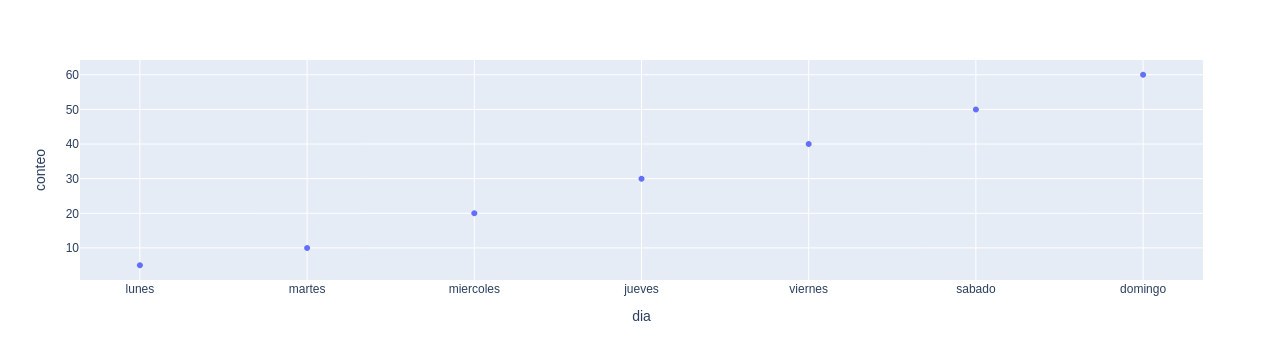

In [24]:
fig = px.scatter(df2,x="dia",y="conteo")
fig.show()